In [1]:
!unzip -qq DCdataset.zip

In [88]:
import os, shutil, pathlib

original_dir = pathlib.Path("./DCdataset/train/")
new_base_dir = pathlib.Path("./cats_vs_dogs_8000")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=7000)
make_subset("validation", start_index=7000, end_index=7500)
make_subset("test", start_index=7500, end_index=8000)

In [89]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [90]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_866 (Conv2D)         (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_867 (Conv2D)         (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                      

In [91]:
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [92]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 14000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [93]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [94]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [95]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [96]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [97]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [98]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
438/438 [==============================] - 27s 56ms/step - loss: 0.6683 - accuracy: 0.5751 - val_loss: 0.6251 - val_accuracy: 0.6750
Epoch 2/30
438/438 [==============================] - 23s 53ms/step - loss: 0.5881 - accuracy: 0.6885 - val_loss: 0.5608 - val_accuracy: 0.7080
Epoch 3/30
438/438 [==============================] - 24s 53ms/step - loss: 0.5179 - accuracy: 0.7449 - val_loss: 0.4779 - val_accuracy: 0.7580
Epoch 4/30
438/438 [==============================] - 24s 53ms/step - loss: 0.4444 - accuracy: 0.7920 - val_loss: 0.4296 - val_accuracy: 0.7900
Epoch 5/30
438/438 [==============================] - 22s 50ms/step - loss: 0.3623 - accuracy: 0.8390 - val_loss: 0.3795 - val_accuracy: 0.8390
Epoch 6/30
438/438 [==============================] - 24s 54ms/step - loss: 0.2934 - accuracy: 0.8736 - val_loss: 0.3555 - val_accuracy: 0.8420
Epoch 7/30
438/438 [==============================] - 23s 53ms/step - loss: 0.2353 - accuracy: 0.9011 - val_loss: 0.3564 - val_accuracy:

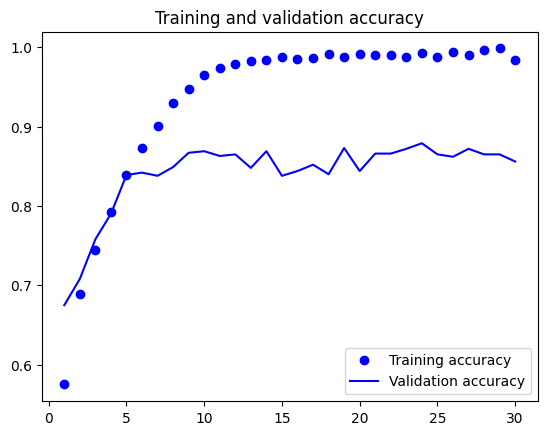

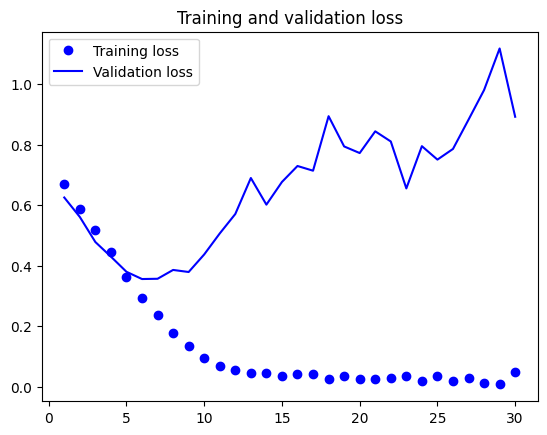

In [100]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [102]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.3653 - accuracy: 0.8290
Test accuracy: 0.829


In [103]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

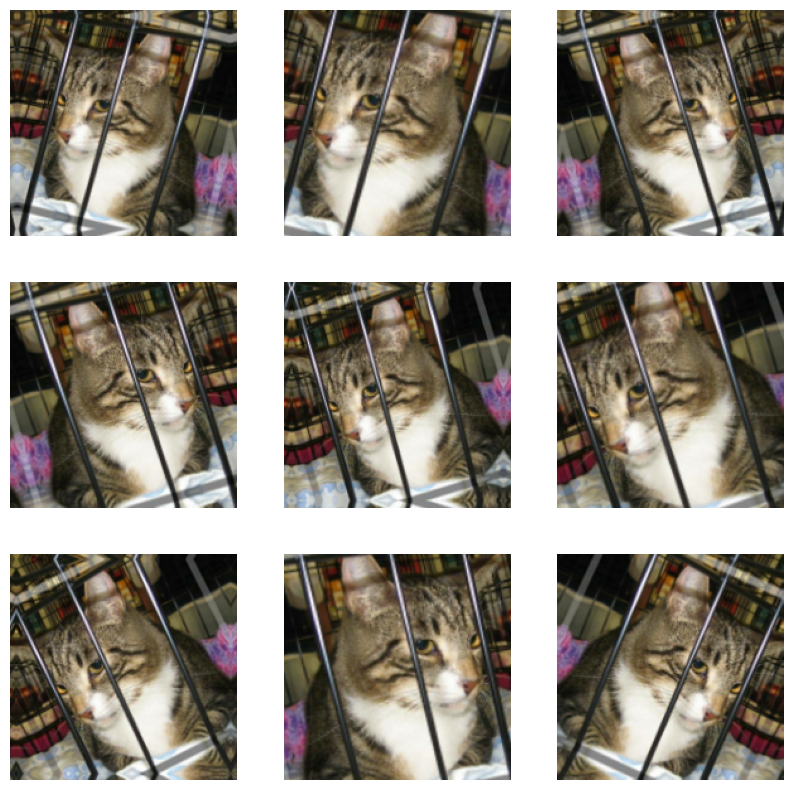

In [104]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [125]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="Adagrad",
              metrics=["accuracy"])

In [126]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
438/438 [==============================] - 28s 57ms/step - loss: 0.6926 - accuracy: 0.5085 - val_loss: 0.6922 - val_accuracy: 0.5120
Epoch 2/100
438/438 [==============================] - 26s 58ms/step - loss: 0.6919 - accuracy: 0.5202 - val_loss: 0.6911 - val_accuracy: 0.5300
Epoch 3/100
438/438 [==============================] - 25s 56ms/step - loss: 0.6907 - accuracy: 0.5361 - val_loss: 0.6899 - val_accuracy: 0.5660
Epoch 4/100
438/438 [==============================] - 25s 56ms/step - loss: 0.6900 - accuracy: 0.5483 - val_loss: 0.6886 - val_accuracy: 0.5870
Epoch 5/100
438/438 [==============================] - 23s 53ms/step - loss: 0.6888 - accuracy: 0.5552 - val_loss: 0.6871 - val_accuracy: 0.5920
Epoch 6/100
438/438 [==============================] - 25s 56ms/step - loss: 0.6874 - accuracy: 0.5621 - val_loss: 0.6851 - val_accuracy: 0.5940
Epoch 7/100
438/438 [==============================] - 25s 56ms/step - loss: 0.6849 - accuracy: 0.5682 - val_loss: 0.6822 - val_ac

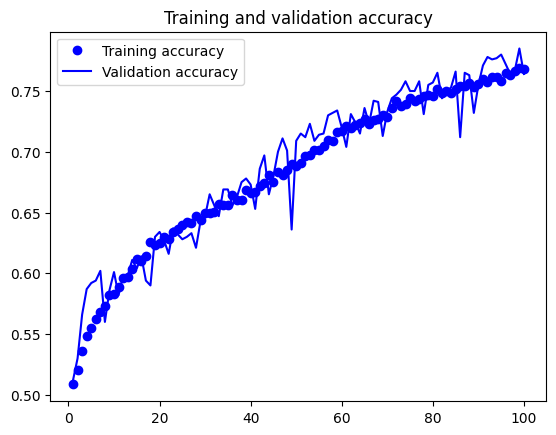

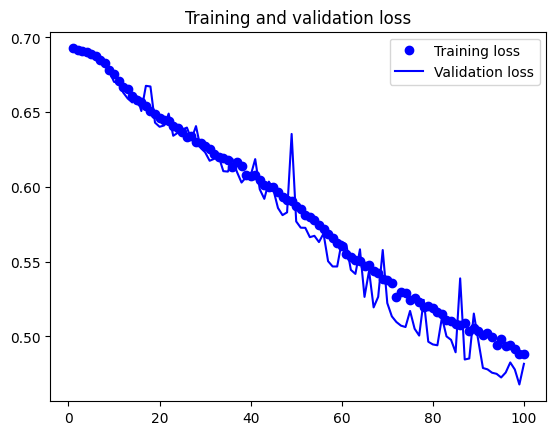

In [127]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [128]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 29ms/step - loss: 0.5000 - accuracy: 0.7560
Test accuracy: 0.756


In [109]:
conv_base = keras.applications.inception_v3.InceptionV3(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [110]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.inception_v3.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 37ms/step


In [111]:
train_features.shape

(14000, 4, 4, 2048)

In [112]:
inputs = keras.Input(shape=(4, 4, 2048))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
438/438 [==============================] - 6s 9ms/step - loss: 4.1086 - accuracy: 0.9664 - val_loss: 3.2639 - val_accuracy: 0.9730
Epoch 2/20
438/438 [==============================] - 3s 7ms/step - loss: 1.4473 - accuracy: 0.9819 - val_loss: 1.9146 - val_accuracy: 0.9770
Epoch 3/20
438/438 [==============================] - 4s 9ms/step - loss: 0.8192 - accuracy: 0.9860 - val_loss: 1.7175 - val_accuracy: 0.9760
Epoch 4/20
438/438 [==============================] - 4s 9ms/step - loss: 0.6531 - accuracy: 0.9864 - val_loss: 1.3112 - val_accuracy: 0.9780
Epoch 5/20
438/438 [==============================] - 3s 6ms/step - loss: 0.3317 - accuracy: 0.9912 - val_loss: 1.4103 - val_accuracy: 0.9760
Epoch 6/20
438/438 [==============================] - 3s 7ms/step - loss: 0.2025 - accuracy: 0.9934 - val_loss: 0.6376 - val_accuracy: 0.9840
Epoch 7/20
438/438 [==============================] - 3s 6ms/step - loss: 0.2077 - accuracy: 0.9931 - val_loss: 0.7826 - val_accuracy: 0.9800
Epoch 

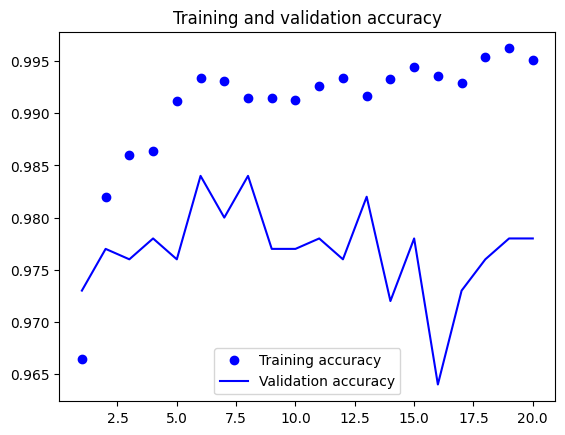

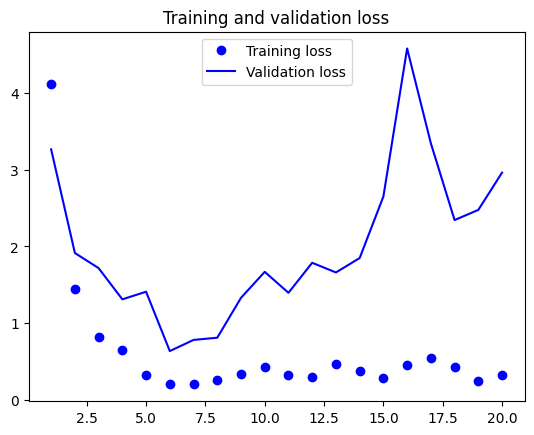

In [113]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [114]:
conv_base  = keras.applications.inception_v3.InceptionV3(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [115]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 188


In [116]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [117]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.inception_v3.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [118]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
438/438 [==============================] - 40s 75ms/step - loss: 5.8819 - accuracy: 0.9419 - val_loss: 2.2393 - val_accuracy: 0.9740
Epoch 2/50
438/438 [==============================] - 29s 65ms/step - loss: 2.8504 - accuracy: 0.9575 - val_loss: 0.7777 - val_accuracy: 0.9780
Epoch 3/50
438/438 [==============================] - 29s 66ms/step - loss: 0.8412 - accuracy: 0.9626 - val_loss: 0.2644 - val_accuracy: 0.9780
Epoch 4/50
438/438 [==============================] - 29s 66ms/step - loss: 0.2679 - accuracy: 0.9652 - val_loss: 0.0762 - val_accuracy: 0.9850
Epoch 5/50
438/438 [==============================] - 28s 64ms/step - loss: 0.1572 - accuracy: 0.9631 - val_loss: 0.0818 - val_accuracy: 0.9780
Epoch 6/50
438/438 [==============================] - 28s 64ms/step - loss: 0.1751 - accuracy: 0.9647 - val_loss: 0.0979 - val_accuracy: 0.9820
Epoch 7/50
438/438 [==============================] - 28s 64ms/step - loss: 0.2091 - accuracy: 0.9644 - val_loss: 0.1198 - val_accuracy:

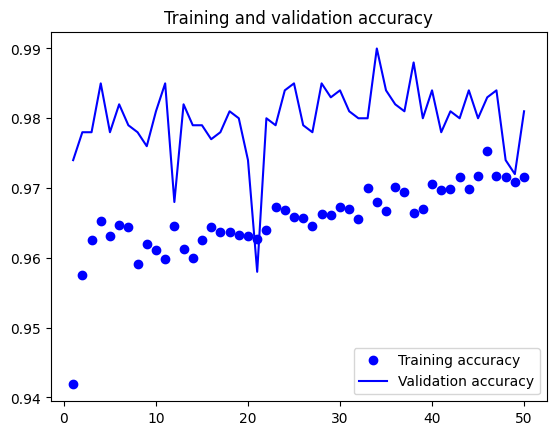

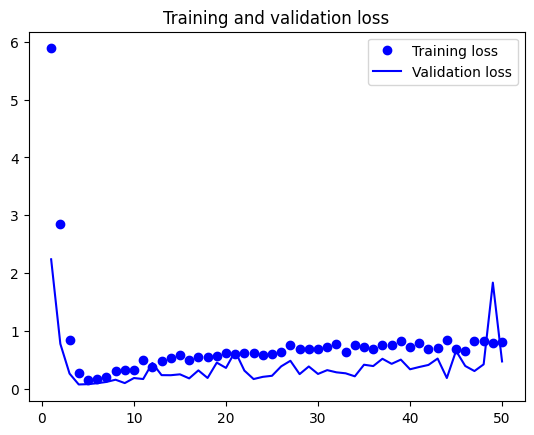

In [119]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [120]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 51ms/step - loss: 0.1091 - accuracy: 0.9820
Test accuracy: 0.982


In [121]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_22 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_970 (Conv2D)            (None, None, None,   864         ['input_22[0][0]']               
                                32)                                                               
                                                                                                  
 batch_normalization_940 (Batch  (None, None, None,   96         ['conv2d_970[0][0]']             
 Normalization)                 32)                                                    

In [122]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [123]:
from keras.optimizers import Adam
optimizer = Adam(lr=0.001)
model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
438/438 [==============================] - 36s 67ms/step - loss: 0.8628 - accuracy: 0.9715 - val_loss: 0.7462 - val_accuracy: 0.9770
Epoch 2/30
438/438 [==============================] - 28s 63ms/step - loss: 0.7672 - accuracy: 0.9723 - val_loss: 0.7483 - val_accuracy: 0.9800
Epoch 3/30
438/438 [==============================] - 28s 64ms/step - loss: 0.8117 - accuracy: 0.9717 - val_loss: 0.5792 - val_accuracy: 0.9780
Epoch 4/30
438/438 [==============================] - 28s 64ms/step - loss: 0.8095 - accuracy: 0.9706 - val_loss: 0.4659 - val_accuracy: 0.9840
Epoch 5/30
438/438 [==============================] - 29s 65ms/step - loss: 0.7591 - accuracy: 0.9735 - val_loss: 0.6588 - val_accuracy: 0.9790
Epoch 6/30
438/438 [==============================] - 27s 62ms/step - loss: 0.8028 - accuracy: 0.9722 - val_loss: 0.4969 - val_accuracy: 0.9820
Epoch 7/30
438/438 [==============================] - 29s 65ms/step - loss: 0.7634 - accuracy: 0.9716 - val_loss: 0.4438 - val_accuracy:

In [124]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 50ms/step - loss: 0.6729 - accuracy: 0.9820
Test accuracy: 0.982
